Collab link:
https://colab.research.google.com/notebooks/mlcc/intro_to_pandas.ipynb

In [0]:
from __future__ import print_function
import pandas as pd

pd.__version__

'0.25.3'

Series are columns in pandas:

In [0]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])


Dataframes are data tables in pandas:

In [0]:
df = pd.DataFrame({ 'City name' : city_names, 'Population' : population} )
print(df.head())
# df.columns
df['Population']

       City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199


0     852469
1    1015785
2     485199
Name: Population, dtype: int64

Importing a dataframe:

In [0]:
chdf = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')
print(chdf.head())
chdf.describe()

   longitude  latitude  ...  median_income  median_house_value
0    -114.31     34.19  ...         1.4936             66900.0
1    -114.47     34.40  ...         1.8200             80100.0
2    -114.56     33.69  ...         1.6509             85700.0
3    -114.57     33.64  ...         3.1917             73400.0
4    -114.57     33.57  ...         1.9250             65500.0

[5 rows x 9 columns]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fdf1b3cc0>,
      dtype=object)

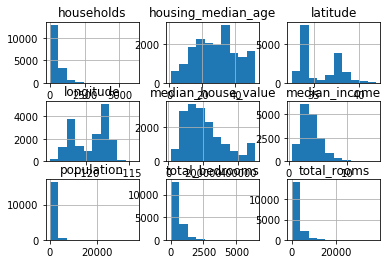

In [0]:
chdf.hist()

Accessing data:

In [0]:
print(type(df['City name']))
df['City name']   # prints the rows of column name

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [0]:
print(type(df['City name'][1]))
df['City name'][1]  # prints row 1 of column name

<class 'str'>


'San Jose'

In [0]:
print(type(df[0:2]))
df[0:2]   # prints rows!!!

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


Manipulating data:

In [0]:
print(population/1000)
# despite we have modified population series, this won't modify the dataframe that contains population
print(df)

0     852.469
1    1015.785
2     485.199
dtype: float64
       City name  Population
0  San Francisco      852469
1       San Jose     1015785
2     Sacramento      485199


In [0]:
import numpy as np

log_pop = np.log(population)
print(log_pop)
log_pop.head()  # head works in series too

0    13.655892
1    13.831172
2    13.092314
dtype: float64


0    13.655892
1    13.831172
2    13.092314
dtype: float64

Adding a column to a df:

In [0]:
df['Log population'] = log_pop
df['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
df['Population density'] = df['Population'] / df['Area square miles']
df.head()

,City name,Population,Log population,Area square miles,Population density
0,San Francisco,852469,13.655892,46.87,18187.945381
1,San Jose,1015785,13.831172,176.53,5754.177760
2,Sacramento,485199,13.092314,97.92,4955.055147


Applying a new column from a function:

In [0]:
overpop = population.apply(lambda val  : val>600000)
print(overpop)
# sorts out which of population is > 600000
df['Overpopulation (>600k)'] = overpop
df.head()

0     True
1     True
2    False
dtype: bool


,City name,Population,Log population,Area square miles,Population density,Overpopulation (>600k)
0,San Francisco,852469,13.655892,46.87,18187.945381,True
1,San Jose,1015785,13.831172,176.53,5754.177760,True
2,Sacramento,485199,13.092314,97.92,4955.055147,False



Exercise #1

In [0]:
city_names = df['City name']
city_saint = city_names.str.contains('San', case=False)  # case not sensitive
city_areasqm = df['Area square miles']
city_gt50 = city_areasqm.apply(lambda val  : val>50)
# df['Saint city'] = city_saint
# df['> 50 sqm'] = city_gt50
df['Saint city & > 50 sqm - option 1'] = city_saint & city_gt50 
#df['Saint city & > 50 sqm - option 2'] = df['City name'].apply(lambda name : name.contains('San')) & df['Area square miles'].apply(lambda val : val>50)  # lambda contains doesn't work
df['Saint city & > 50 sqm - option 2'] = df['City name'].apply(lambda name : name.startswith('San')) & df['Area square miles'].apply(lambda val : val>50)  # lambda startswith does work
df['Saint city & > 50 sqm - option 3'] = df['City name'].str.contains('San', case=False) & df['Area square miles'].apply(lambda val : val>50)
df['Saint city & > 50 sqm - option 4'] = df['City name'].str.contains('San', case=False) & (df['Area square miles']>50)  # the () are needed!
print(df.shape)
df.head()

(3, 11)


,City name,Population,Log population,Area square miles,Population density,Overpopulation (>600k),Saint city & > 50 sqm,Saint city & > 50 sqm - option 1,Saint city & > 50 sqm - option 2,Saint city & > 50 sqm - option 3,Saint city & > 50 sqm - option 4
0,San Francisco,852469,13.655892,46.87,18187.945381,True,False,False,False,False,False
1,San Jose,1015785,13.831172,176.53,5754.177760,True,True,True,True,True,True
2,Sacramento,485199,13.092314,97.92,4955.055147,False,False,False,False,False,False



Exercise #2

In [0]:
print(df.reindex([2,0,1]))  # reindex does not modify the table
df = df.reindex([2,0,1])  # like this, the df is modified

,City name,Population,Log population,Area square miles,Population density,Overpopulation (>600k),Saint city & > 50 sqm,Saint city & > 50 sqm - option 1,Saint city & > 50 sqm - option 2,Saint city & > 50 sqm - option 3,Saint city & > 50 sqm - option 4
2,Sacramento,485199,13.092314,97.92,4955.055147,False,False,False,False,False,False
0,San Francisco,852469,13.655892,46.87,18187.945381,True,False,False,False,False,False
1,San Jose,1015785,13.831172,176.53,5754.177760,True,True,True,True,True,True


In [0]:
print(df.index)
print(np.random.permutation(df.index))
df.reindex(np.random.permutation(df.index))

RangeIndex(start=0, stop=3, step=1)
[2 1 0]


,City name,Population,Log population,Area square miles,Population density,Overpopulation (>600k),Saint city & > 50 sqm,Saint city & > 50 sqm - option 1,Saint city & > 50 sqm - option 2,Saint city & > 50 sqm - option 3,Saint city & > 50 sqm - option 4
2,Sacramento,485199,13.092314,97.92,4955.055147,False,False,False,False,False,False
0,San Francisco,852469,13.655892,46.87,18187.945381,True,False,False,False,False,False
1,San Jose,1015785,13.831172,176.53,5754.177760,True,True,True,True,True,True


In [0]:
df.reindex([2,0,1,1000])

,City name,Population,Log population,Area square miles,Population density,Overpopulation (>600k),Saint city & > 50 sqm,Saint city & > 50 sqm - option 1,Saint city & > 50 sqm - option 2,Saint city & > 50 sqm - option 3,Saint city & > 50 sqm - option 4
2,Sacramento,485199.0,13.092314,97.92,4955.055147,False,False,False,False,False,False
0,San Francisco,852469.0,13.655892,46.87,18187.945381,True,False,False,False,False,False
1,San Jose,1015785.0,13.831172,176.53,5754.177760,True,True,True,True,True,True
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
